In [6]:
import numpy as np
import pandas as pd

In [7]:
import pandas as pd

# List of possible encodings to try
encodings = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']

# Change this to the path of your CSV file
file_path = '/content/spam.csv'

# Attempt to read the CSV file with different encodings
for encoding in encodings:
    try:
        df = pd.read_csv(file_path, encoding=encoding)
        print(f"File successfully read with encoding: {encoding}")
        break  # Stop the Loop if successful
    except UnicodeDecodeError:
        print(f"Failed to read with encoding: {encoding}")
        continue  # Try the next encoding

# If the Loop completes without success, df will not be defined
if 'df' in locals():
    print("CSV file has been successfully loaded.")
else:
    print("All encoding attempts failed. Unable to read the CSV file.")


Failed to read with encoding: utf-8
File successfully read with encoding: latin1
CSV file has been successfully loaded.


In [8]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1408,ham,"I've got ten bucks, jay is being noncomittal",NaN,NaN,NaN
2917,ham,Thanks chikku..:-) gud nyt:-*,NaN,NaN,NaN
1799,ham,"If we hit it off, you can move in with me :)",NaN,NaN,NaN
3346,ham,No problem baby. Is this is a good time to tal...,NaN,NaN,NaN
4000,ham,He's just gonna worry for nothing. And he won'...,NaN,NaN,NaN


In [9]:
df.shape

(5572, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [11]:
# drop Last 3 cols
df.drop (columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [12]:
df.sample(5)

,v1,v2
5526,spam,PRIVATE! Your 2003 Account Statement for shows...
1590,ham,Somewhr someone is surely made 4 u. And God ha...
1408,ham,"I've got ten bucks, jay is being noncomittal"
275,ham,Thanx...
197,ham,is your hamster dead? Hey so tmr i meet you at...


In [13]:
# renaming the cols
df.rename(columns={'v1' : 'target', 'v2': 'text'},inplace=True)
df.sample (5)

,target,text
584,ham,So how's scotland. Hope you are not over showi...
4140,ham,Beautiful truth : Expression of the face could...
5361,ham,Yep get with the program. You're slacking.
3279,ham,Badrith is only for chennai:)i will surely pic...
5005,ham,ILL B DOWN SOON


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder ()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [18]:
# check for duplicate values
df. duplicated ().sum()

403

In [19]:
# remove duplicates
df = df.drop_duplicates (keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

In [22]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

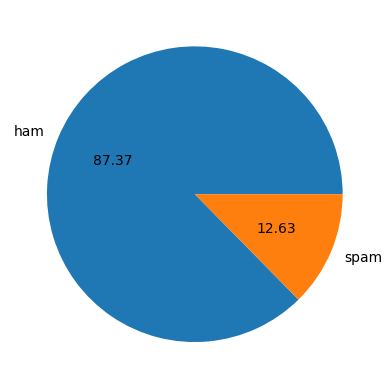

In [24]:
import matplotlib.pyplot as plt
plt.pie(df [ 'target'].value_counts(), labels=['ham', 'spam' ], autopct = "%0.2f")
plt.show()

In [25]:
import nltk

In [26]:
!pip install nltk

In [27]:
nltk.download ('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
df['num_characters'] = df['text'].apply(len) #number of char

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
# number of words
df['num_words'] = df['text'].apply(lambda x:len (nltk.word_tokenize(x))) #words count

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk. sent_tokenize(x)))#sentence

In [33]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_words', ylabel='Count'>

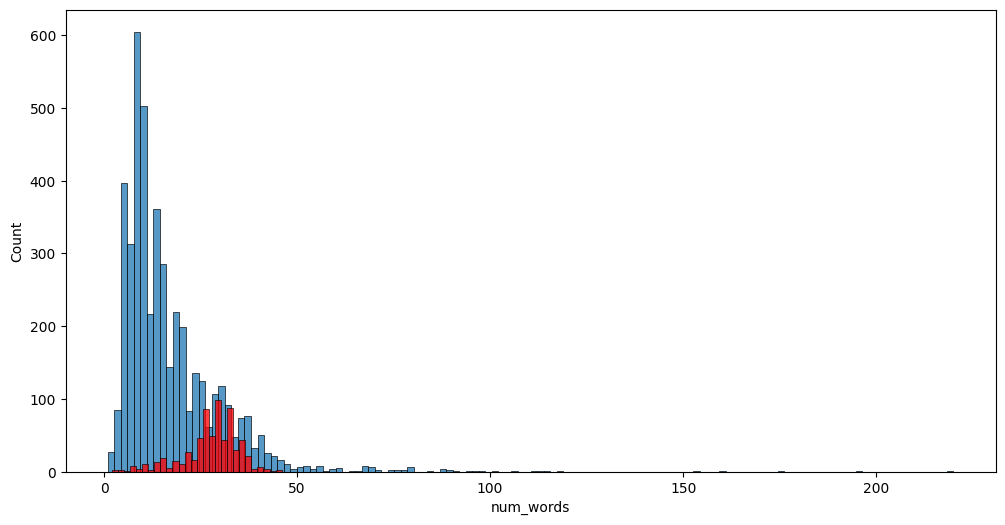

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

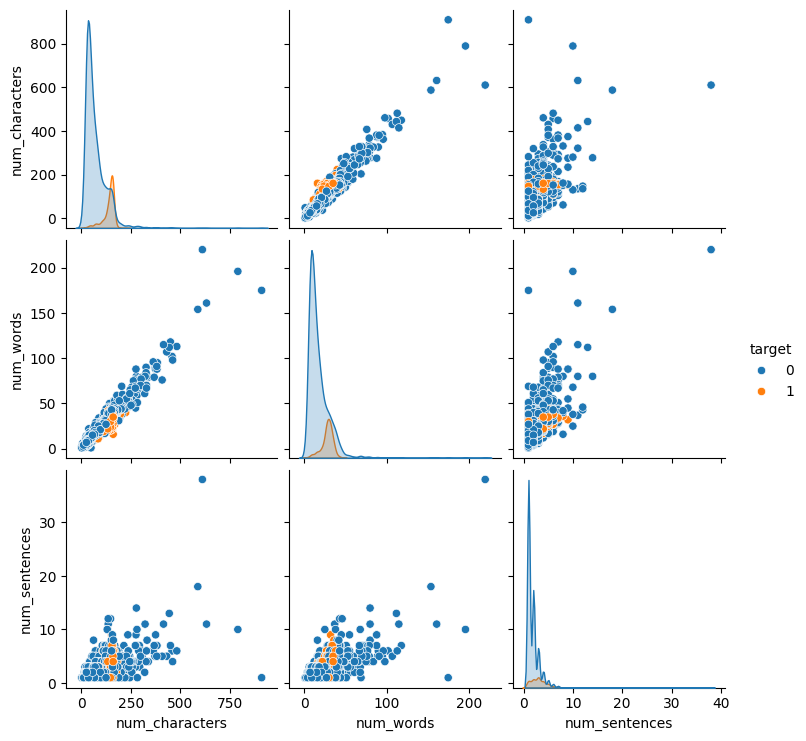

In [39]:
sns.pairplot(df,hue='target')

<ipython-input-40-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

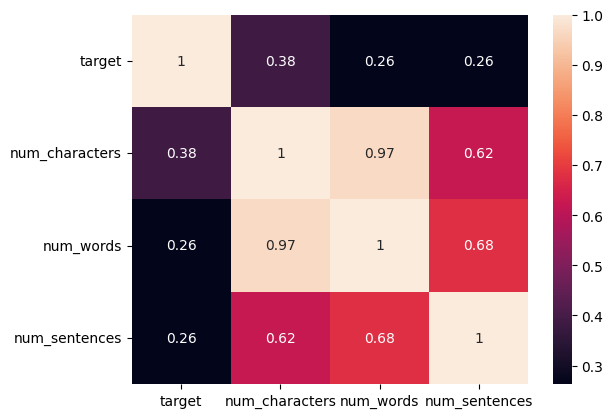

In [40]:
sns.heatmap(df.corr(),annot=True)

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps = PorterStemmer()
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.?")

print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [42]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [43]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
df['transformed_text'] = df['text'].apply(transform_text)

In [45]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

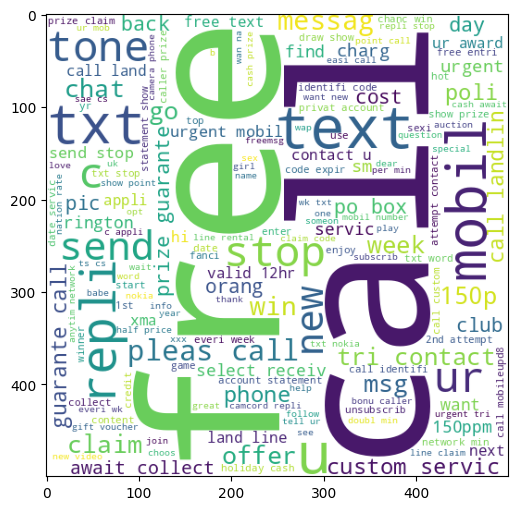

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

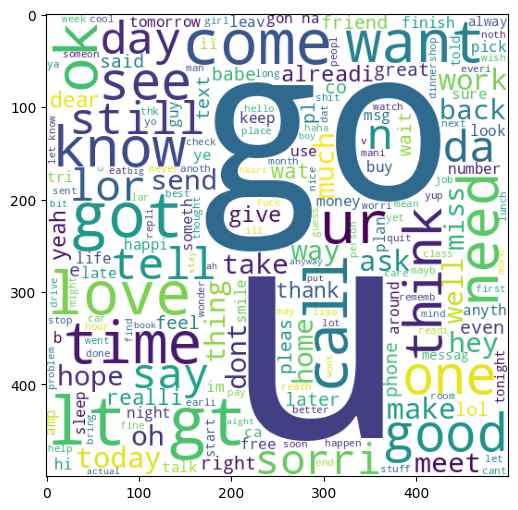

In [50]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

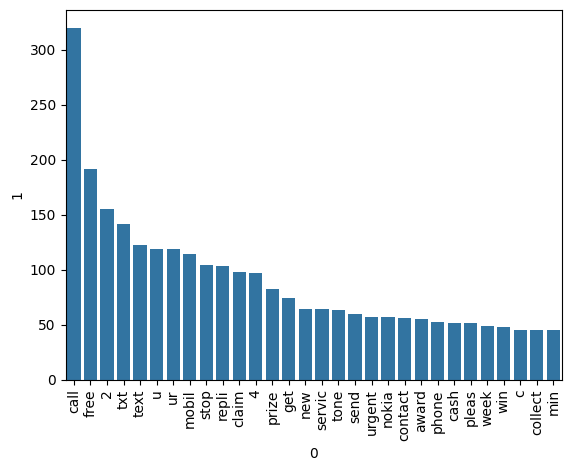

In [54]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming spam_corpus is a list or iterable containing the spam data

# Create a Counter object to count the occurrences of each element in spam_corpus
spam_counter = Counter(spam_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common elements
df_spam = pd.DataFrame(spam_counter.most_common(30))

# Create a bar plot using Seaborn
sns.barplot(x=df_spam[0], y=df_spam[1])

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [55]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [56]:
len(ham_corpus)

35404

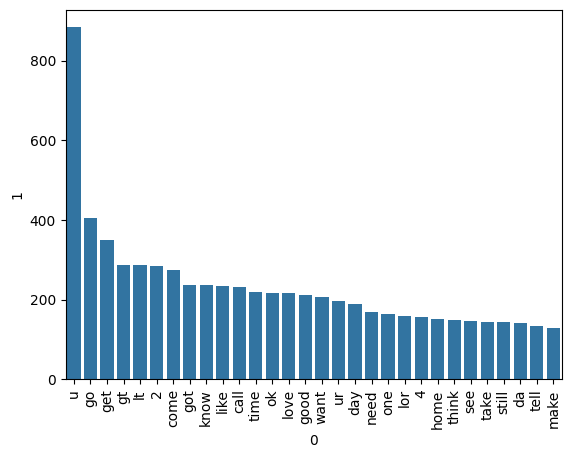

In [57]:
from collections import Counter
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming ham_corpus is a list or iterable containing the ham (non-spam) data

# Create a Counter object to count the occurrences of each element in ham_corpus
ham_counter = Counter(ham_corpus)

# Convert the Counter object to a DataFrame and select the top 30 most common elements
df_ham = pd.DataFrame(ham_counter.most_common(30))

# Create a bar plot using Seaborn
sns.barplot(x=df_ham[0], y=df_ham[1])

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation='vertical')

# Display the plot
plt.show()


In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)


In [60]:
X = tfidf.fit_transform(df['transformed_text']).toarray()



In [61]:
X.shape

(5169, 3000)

In [62]:
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=2)



In [65]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score



In [66]:
gnb = GaussianNB()

mnb = MultinomialNB()

bnb = BernoulliNB()


In [67]:
gnb.fit(X_train,y_train)
y_pred1 =  gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [68]:
mnb.fit(X_train,y_train)
y_pred2 =  mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 =  bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
!pip install xgboost

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [72]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='11')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [73]:
clfs = {'SVC' : svc,
        'KN' : knc,
        'NB': mnb,
        'DT': dtc,
        'RF': rfc,
        'AdaBoost': abc,
        'BgC': bc,
        'ETC': etc,
        'GBDT':gbdt,
        'xgb':xgb
        }


In [74]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision


In [75]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9758220502901354, 0.9747899159663865)

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)


  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8333333333333334
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [77]:
performance_df = pd. DataFrame({'Algorithm' : clfs.keys (), 'Accuracy': accuracy_scores, 'Precision': precision_scores }). sort_values ('Precision', ascending=False)


In [78]:
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
4,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
7,ETC,0.974855,0.974576
5,AdaBoost,0.960348,0.929204
9,xgb,0.967118,0.926230
8,GBDT,0.946809,0.919192
6,BgC,0.958414,0.868217
3,DT,0.932302,0.833333


In [79]:
performance_df1 = pd.melt (performance_df, id_vars= "Algorithm")

In [80]:
performance_df1


,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,AdaBoost,Accuracy,0.960348
6,xgb,Accuracy,0.967118
7,GBDT,Accuracy,0.946809
8,BgC,Accuracy,0.958414
9,DT,Accuracy,0.932302


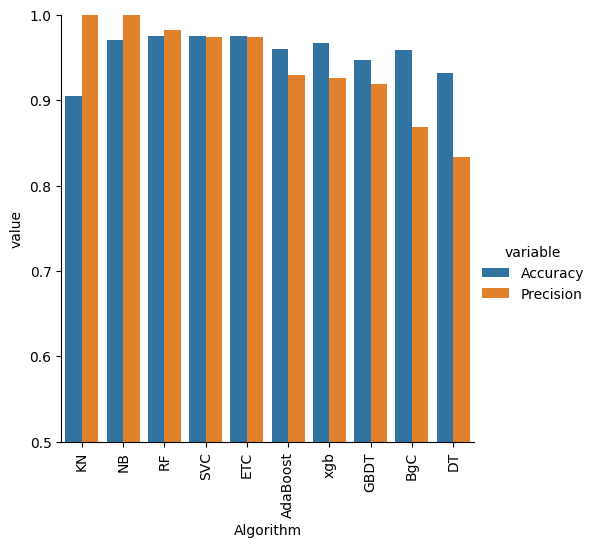

In [81]:
sns.catplot (x = 'Algorithm', y='value',
hue = 'variable', data=performance_df1, kind='bar',height=5)
plt.ylim (0.5,1.0)
plt.xticks (rotation='vertical')
plt.show()



In [82]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys (), 'Accuracy_max_ft_3000': accuracy_scores, 'Precision_max_ft_3000': precision_scores}). sort_values('Precision_max_ft_3000', ascending=False)


In [83]:
new_df = performance_df.merge (temp_df,on='Algorithm')


In [84]:
new_df_scaled = new_df.merge (temp_df, on='Algorithm')


In [85]:
temp_df = pd.DataFrame({'Algorithm': clfs.keys (), 'Accuracy_num_chars': accuracy_scores, 'Precision_num_chars': precision_scores})

In [86]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
8,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217
9,DT,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333,0.932302,0.833333


In [87]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50,random_state = 2)

from sklearn.ensemble import VotingClassifier

In [88]:
voting = VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')


In [89]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [90]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [91]:
estimators=[('svm', svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [92]:
from sklearn.ensemble import StackingClassifier

In [93]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [94]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9806576402321083
Precision 0.9538461538461539
